# <center> Program to analyze and find salary of a job profile</center>
### <center>by Sushant Deshpande</center>

I wrote this program so that it can scrape and analyze several jobs listed on Indeed.com or Indeed.ca in this case since I am in Canada and find the average salary of jobs. In addition to this, it also tells us which city in Canada has the maximum number of jobs and maximum salary. I have plotted all this using bar graph to make it visually easy to understand.

 Let's start by asking the user which job title he wants search for. First, we create a variable called <b> *job_title_1*</b> and store the user input in it

In [1]:
#job_title_1 = input("Enter the Job Title: ")
job_title_1 = "Data Analyst"

#### Now let's import the required libries

In [2]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
print('Libraries imported.')

Libraries imported.


The way Indeed works is it takes the given user input, converts it to lower case and replaces the spaces with +. So we need to do the same.

Let's convert the job title to lower case using <b>.lower()</b> method.

Then, let's replace the spaces with + using <b>.repalce()</b> method.

And then let's see how the output looks, <b>job_title_3</b> in this case.

In [3]:
job_title_2 = job_title_1.lower() # convert to lower case
job_title_3 = job_title_2.replace(' ', '+') # replace space with +
job_title_3

'data+analyst'

In our case, since we are searching for <b>Data Scientist</b> the output looks good, <b>*data+scientist*</b>

In [4]:
from datetime import date
today = date.today()

In [5]:
# Textual month, day and year
d2 = today.strftime("%d-%B-%Y")
d2

'14-April-2021'

In [6]:
job_title_lower = job_title_1.lower() # convert to lower case
job_title_us = job_title_2.replace(' ', '_') # replace space with +
job_title_us

'data_analyst'

Now let's write the code that can scrape Indeed.ca with our <b>*job_title_3*</b>

Here we insert job_title_3 into our url using concatenate feature in python

In [7]:
url = 'https://www.indeed.ca/jobs?q='+job_title_3+'&l=canada'
page = requests.get(url)
soup = BeautifulSoup(page.text, "html.parser")
#print(soup.prettify())

Let's check the url that we just parsed, just to be sure.

In [8]:
url

'https://www.indeed.ca/jobs?q=data+analyst&l=canada'

Now that we have the the url, let's write a function that will parse the url, extract the data and store it in a dataframe.

In order to get a proper data set, we need to parse more than one page. So let's write the code to parse first 10 pages and store them in the same dataframe using <b>pd.concat</b> function.

In [9]:
sleep_timer = 10

In [10]:
def parse(url):
    time.sleep(sleep_timer)
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser', from_encoding="utf-8")
    df = pd.DataFrame(columns=["Title","Location","Company","Salary"])
    for each in soup.find_all(class_= "result" ):
        time.sleep(sleep_timer)
        try: 
            title = each.find(class_='jobtitle').text.replace('\n', '')
        except:
            title = 'None'
        try:
            location = each.find('span', {'class':"location" }).text.replace('\n', '')
        except:
            location = 'None'
        try: 
            company = each.find(class_='company').text.replace('\n', '')
        except:
            company = 'None'
        try:
            salary = each.find('span', {'class':'no-wrap'}).text.replace('\n', '')
        except:
            salary = 'None'
        #synopsis = each.find('span', {'class':'summary'}).text.replace('\n', '')
        df = df.append({'Title':title, 'Location':location, 'Company':company, 'Salary':salary}, ignore_index=True)
    return df
df1 = parse(url)
url_1 = url + "&start=20"
url_2 = url + "&start=40"
url_3 = url + "&start=60"
url_4 = url + "&start=80"
url_5 = url + "&start=100"
url_6 = url + "&start=120"
url_7 = url + "&start=140"
url_8 = url + "&start=160"
url_9 = url + "&start=180"
url_10 = url + "&start=200"

df2 = parse(url_1)
time.sleep(sleep_timer)
df3 = parse(url_2)
time.sleep(sleep_timer)
df4 = parse(url_3)
time.sleep(sleep_timer)
df5 = parse(url_4)
time.sleep(sleep_timer)
df6 = parse(url_5)
time.sleep(sleep_timer)
df7 = parse(url_6)
time.sleep(sleep_timer)
df8 = parse(url_7)
time.sleep(sleep_timer)
df9 = parse(url_8)
time.sleep(sleep_timer)
df10 = parse(url_9)
time.sleep(sleep_timer)
df11 = parse(url_10)

data1 = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11], axis=0, ignore_index=True)
data1.head()

,Title,Location,Company,Salary
0,"Data Analyst, Group Underwriting",None,Sun Life Financial,None
1,Data Analyst/Engineer,None,TELUS,$75 - $80 an hour
2,Technical Business Analyst,None,Indeed,"$80,000 - $106,000 a year"
3,Senior Data Analyst,None,Charger Logistics Inc.,None
4,Agile Business Analyst,None,Elections Ontario,"$59,744 a year"


In [11]:
data1.shape

(167, 4)

In [12]:
data1.to_csv('data/data-raw-'+job_title_us+'-'+str(d2)+'.csv', index=False)

Once we have the dataset, we can see that it has a lot of stuff that we don't need like \n, $ etc. So let's clean up the data.

When we check the data type of data1, we can see that <b>Salary</b> is stored as an object. In addition to that, Salary is defined as per year, per month, per week and per hour. In order for our analysis to work, we need to have salary displayed as per year and the column salary itself should be either <b>*float*</b> or <b>*int*</b>.

In [13]:
data1.dtypes # here, salary is an object

Title       object
Location    object
Company     object
Salary      object
dtype: object

In [14]:
data_sal_year_temp = data1[data1['Salary'].str.contains(' a year')].reset_index(drop=True)
data_sal_year_1a = data_sal_year_temp.replace(' a year', '', regex=True) # replace 'a year'
data_sal_year_1 = data_sal_year_1a.replace('\n', '', regex=True) # replace \n
data_sal_year_2 = data_sal_year_1.replace('[\$,)]', '', regex=True) # replace $
data_sal_year_3a = data_sal_year_2['Salary'].str.split('-', expand=True)
data_sal_year_3a.iloc[:, :] = data_sal_year_3a.iloc[:, :].astype('float')
data_sal_year_3b = data_sal_year_3a.sum(axis=1).astype('float')
data_sal_year_3c = (data_sal_year_3b/2)
data_sal_year_3 = data_sal_year_3c.astype('int')
data_sal_year_5 = pd.concat([data_sal_year_2, data_sal_year_3], axis=1, sort=True)
data_sal_year_6 = data_sal_year_5.drop(['Salary'], axis=1)

This segment takes the salary per month and converts it to per year

In [15]:
data_sal_month_temp = data1[data1['Salary'].str.contains(' a month')].reset_index(drop=True)
data_sal_month_1a = data_sal_month_temp.replace(' a month', '', regex=True)
data_sal_month_1 = data_sal_month_1a.replace('\n', '', regex=True)
data_sal_month_2 = data_sal_month_1.replace('[\$,)]', '', regex=True)
data_sal_month_3a = data_sal_month_2['Salary'].str.split('-', expand=True)
data_sal_month_3a.iloc[:, :] = data_sal_month_3a.iloc[:, :].astype('float')
data_sal_month_3b = data_sal_month_3a.sum(axis=1).astype('float')
data_sal_month_3c = (data_sal_month_3b/2) * 12
data_sal_month_3 = data_sal_month_3c.astype('int')
data_sal_month_5 = pd.concat([data_sal_month_2, data_sal_month_3], axis=1, sort=True)
data_sal_month_6 = data_sal_month_5.drop(['Salary'], axis=1)

This segment takes the salary per week and converts it to per year

In [16]:
data_sal_week_temp = data1[data1['Salary'].str.contains(' a week')].reset_index(drop=True)
data_sal_week_1a = data_sal_week_temp.replace(' a week', '', regex=True)
data_sal_week_1 = data_sal_week_1a.replace('\n', '', regex=True)
data_sal_week_2 = data_sal_week_1.replace('[\$,)]', '', regex=True)
data_sal_week_3a = data_sal_week_2['Salary'].str.split('-', expand=True)
data_sal_week_3a.iloc[:, :] = data_sal_week_3a.iloc[:, :].astype('float')
data_sal_week_3b = data_sal_week_3a.sum(axis=1).astype('float')
data_sal_week_3c = (data_sal_week_3b/2) * 52
data_sal_week_3 = data_sal_week_3c.astype('int')
data_sal_week_5 = pd.concat([data_sal_week_2, data_sal_week_3], axis=1, sort=True)
data_sal_week_6 = data_sal_week_5.drop(['Salary'], axis=1)

This segment takes the salary per hour and converts it to per year

In [17]:
data_sal_hour_temp = data1[data1['Salary'].str.contains(' an hour')].reset_index(drop=True)
data_sal_hour_1a = data_sal_hour_temp.replace(' an hour', '', regex=True)
data_sal_hour_1 = data_sal_hour_1a.replace('\n', '', regex=True)
data_sal_hour_2 = data_sal_hour_1.replace('[\$,)]', '', regex=True)
data_sal_hour_3a = data_sal_hour_2['Salary'].str.split('-', expand=True)
data_sal_hour_3a.iloc[:, :] = data_sal_hour_3a.iloc[:, :].astype('float')
data_sal_hour_3b = data_sal_hour_3a.sum(axis=1).astype('float')
data_sal_hour_3c = (data_sal_hour_3b/2) * 40 * 52
data_sal_hour_3 = data_sal_hour_3c.astype('int')
data_sal_hour_5 = pd.concat([data_sal_hour_2, data_sal_hour_3], axis=1, sort=True)
data_sal_hour_6 = data_sal_hour_5.drop(['Salary'], axis=1)

Let's sort the rows that don't have any salary mentioned and save them in <b>data_sal_none_temp</b>

In [18]:
data_sal_none_temp = data1[data1['Salary'].str.contains('None')].reset_index(drop=True)
data_sal_none_temp.head()

,Title,Location,Company,Salary
0,"Data Analyst, Group Underwriting",None,Sun Life Financial,None
1,Senior Data Analyst,None,Charger Logistics Inc.,None
2,Data Quality Analyst,None,Softchoice,None
3,Data Scientist/Analyst – Summer Placement,"Calgary, AB",Grey Owl Engineering,None
4,"Analyst, Data Management","Calgary, AB",Stantec,None


Now let's bring together our newly formed dataset and save it as <b>data_sal_all</b> and rename the table header as <b>Title</b>, <b>Location</b>, <b>Company</b> and <b>Salary</b>

In [19]:
data_sal_all = pd.concat([data_sal_year_6, data_sal_month_6, data_sal_week_6, data_sal_hour_6], axis=0, sort=True)
data_sal_all.columns = ['Title', 'Location', 'Company', 'Salary']
data_sal_all.sort_values(by='Salary',ascending=True, inplace=True)
data_sal_all.head()

,Title,Location,Company,Salary
15,Data Analyst / Quality Assurance Lead,None,Pathstone Mental Health,15129
3,Energy Data Entry Specialist/Analyst (12-Month...,Burnaby BC,PUMA Utility Monitoring Inc.,18720
1,Energy Data Entry Specialist/Analyst (12-Month...,Burnaby BC,PUMA Utility Monitoring Inc.,18720
8,211 Data Analyst,Riverside ON,Inland Empire United Way,22880
2,analyst investments,Corner Brook NL,NORTHERN LIGHTS SEAFOOD INC.,27040


Now, let's join the two data sets, <b>data_sal_all</b> and <b>data_sal_none_temp</b> and save them in <b>data_sal_all_1</b>

In [20]:
data_sal_all_1 = pd.concat([data_sal_all, data_sal_none_temp], axis=0, sort=True)
data_sal_all_1.head()

,Company,Location,Salary,Title
15,Pathstone Mental Health,None,15129,Data Analyst / Quality Assurance Lead
3,PUMA Utility Monitoring Inc.,Burnaby BC,18720,Energy Data Entry Specialist/Analyst (12-Month...
1,PUMA Utility Monitoring Inc.,Burnaby BC,18720,Energy Data Entry Specialist/Analyst (12-Month...
8,Inland Empire United Way,Riverside ON,22880,211 Data Analyst
2,NORTHERN LIGHTS SEAFOOD INC.,Corner Brook NL,27040,analyst investments


Let's see the shape of <b>data_sal_all_1</b>

In [21]:
data_sal_all_1.shape

(167, 4)

The shape of <b>data_sal_all_1</b> is <b>(283, 5)</b> which is same as the shape of <b>data1</b>.
This proves that we successfully managed to merge the 2 datasets without missing any row.

Now let's replace <b>'None'</b> values with <b>np.nan</b> and change the data type of <b>Salary</b> to *float*

In [22]:
data5a = data_sal_all_1.replace('None',np.nan, regex=True)
data5a['Salary'].astype('float')

15     15129.0
3      18720.0
1      18720.0
8      22880.0
2      27040.0
1      29872.0
13     31200.0
4      36400.0
11     40500.0
7      41256.0
9      41256.0
6      45240.0
15     46800.0
12     46800.0
10     47500.0
3      50000.0
14     52500.0
17     52788.0
16     60000.0
5      66753.0
18     68450.0
20     69577.0
2      70000.0
8      72600.0
14     72800.0
5      72800.0
7      75000.0
4      75922.0
6      77500.0
0      77742.0
        ...   
98         NaN
99         NaN
100        NaN
101        NaN
102        NaN
103        NaN
104        NaN
105        NaN
106        NaN
107        NaN
108        NaN
109        NaN
110        NaN
111        NaN
112        NaN
113        NaN
114        NaN
115        NaN
116        NaN
117        NaN
118        NaN
119        NaN
120        NaN
121        NaN
122        NaN
123        NaN
124        NaN
125        NaN
126        NaN
127        NaN
Name: Salary, Length: 167, dtype: float64

Now, let's find the mean of the the cell Sa;ary using the .mean() method

In [23]:
mean_1 = data5a['Salary'].mean()
mean_1

63148.58974358974

We can now replace the np.nan cells with the mean salary obtained in the previous step.

Let's also change the datatype to *int*

In [24]:
data5b = data5a['Salary'].replace(np.nan, mean_1)
data5ba = data5b.astype('int')

Let's concact this salary to our previous dataframe <b>data_sal_all_1</b>

In [25]:
data5c = pd.concat([data_sal_all_1, data5ba], axis=1)
data5c.reset_index()

,index,Company,Location,Salary,Title,Salary
0,15,Pathstone Mental Health,None,15129,Data Analyst / Quality Assurance Lead,15129
1,3,PUMA Utility Monitoring Inc.,Burnaby BC,18720,Energy Data Entry Specialist/Analyst (12-Month...,18720
2,1,PUMA Utility Monitoring Inc.,Burnaby BC,18720,Energy Data Entry Specialist/Analyst (12-Month...,18720
3,8,Inland Empire United Way,Riverside ON,22880,211 Data Analyst,22880
4,2,NORTHERN LIGHTS SEAFOOD INC.,Corner Brook NL,27040,analyst investments,27040
5,1,Elections Ontario,None,29872,Agile Business Analyst,29872
6,13,MSi Corp (Bell Canada,Quebec City QC,31200,Business Intelligence Developer,31200
7,4,Manpower,None,36400,HR Data Analyst,36400
8,11,EU Health and Innovations Inc.,Thornhill ON,40500,data analyst - informatics and systems,40500
9,7,PHSA,Kamloops BC,41256,Data Centre Analyst III,41256


Now we have two Salary columns in our dataframe, so we rename the old one to Salary_1 and drop it.

In [26]:
data5c.columns = ['Company', 'Location', 'Salary_1', 'Title', 'Salary']
data5d = data5c.drop(['Salary_1'], axis=1)
data5d.head()

,Company,Location,Title,Salary
15,Pathstone Mental Health,None,Data Analyst / Quality Assurance Lead,15129
3,PUMA Utility Monitoring Inc.,Burnaby BC,Energy Data Entry Specialist/Analyst (12-Month...,18720
1,PUMA Utility Monitoring Inc.,Burnaby BC,Energy Data Entry Specialist/Analyst (12-Month...,18720
8,Inland Empire United Way,Riverside ON,211 Data Analyst,22880
2,NORTHERN LIGHTS SEAFOOD INC.,Corner Brook NL,analyst investments,27040


In [27]:
data5d.to_csv('data/data-'+job_title_us+'-'+str(d2)+'.csv', index=False)

Let's procede with the cleanup of our dataset. Let's drop the cells that don't have any location as it won't be useful to us in our analysis.

In [28]:
data6a = data5d.replace('None',np.nan, regex=True)
data6 = data6a[pd.notnull(data5d["Location"])]
data6 = data6.reset_index(drop=True)
data7 = data6.groupby('Location').count()
sort_data = data7.sort_values('Title',ascending=False)

In [29]:
sort_data.head(10)

,Company,Title,Salary
Location,,,
"Toronto, ON",34,34,34
"Vancouver, BC",11,11,11
Remote,8,8,8
"Ottawa, ON",8,8,8
"Montréal, QC",6,6,6
"Calgary, AB",6,6,6
Ontario,4,4,4
Toronto ON,4,4,4
"Markham, ON",4,4,4


As we can see above, <b>sort_data</b> has a location <b>Canada</b>. We need to drop that row. Since we made our code flexible by asking the user to input his job title, this field might not show up in other job titles. Hence we need to write the code that will check if this field is there, and if it, drop it, else procede without doing anything.

In [30]:
sort_data_canada_1 = sort_data.reset_index()
sort_data_canada_2 = sort_data_canada_1.iloc[:, 0]
sort_data_canada_3 = sort_data_canada_2.isin(['Canada'])

In [31]:
if sort_data_canada_3.any() == True:
    sort_data_1 = sort_data.drop(['Canada'], axis=0)
else:
    sort_data_1 = sort_data

In [32]:
sort_data_2 = sort_data_1.reset_index()
sort_data_2.head()

,Location,Company,Title,Salary
0,"Toronto, ON",34,34,34
1,"Vancouver, BC",11,11,11
2,Remote,8,8,8
3,"Ottawa, ON",8,8,8
4,"Montréal, QC",6,6,6


Now let's split the location into <b>City</b> and <b>Provience</b>

In [33]:
data1 = sort_data_2['Location'].str.split(',', expand=True)
data1.columns = ['City', 'Provience']
data1.head()

,City,Provience
0,Toronto,ON
1,Vancouver,BC
2,Remote,None
3,Ottawa,ON
4,Montréal,QC


Now let's merge this new data with the previous data and drop the column <b>Location</b>

In [34]:
data2 = pd.concat([data1, sort_data_2], axis=1, sort=False)
data3 = data2.drop(['Location'], axis=1)
data3.head()

,City,Provience,Company,Title,Salary
0,Toronto,ON,34,34,34
1,Vancouver,BC,11,11,11
2,Remote,None,8,8,8
3,Ottawa,ON,8,8,8
4,Montréal,QC,6,6,6


Let's see which <b>Provience</b> has the maximum number of jobs.

In [35]:
data4 = data3.groupby('Provience')['Title'].apply(lambda x: ', '.join(x.astype(str))).reset_index()
data5 = data4['Title'].str.split(',', expand=True)
data5.iloc[:, :] = data5.iloc[:, :].astype(float)
data5['Total'] = data5.sum(axis=1).astype(int)
data8 = data5.loc[:, 'Total']
data9 = data4.loc[:, 'Provience']
data10 = pd.concat([data9, data8], axis=1, sort=True)
data10

,Provience,Total
0,AB,6
1,BC,16
2,MB,3
3,NS,2
4,ON,61
5,QC,11
6,SK,2


Let's sort the dataframe by which <b>City</b> has the maximum number of jobs and arrange it in ascending order.

In [36]:
data11 = sort_data_1
data11.sort_values(by='Title', ascending=True, inplace=True)
data12 = data11.loc[:, 'Title']
data13 = data12.tail(15)
data13

Location
Halifax, NS       2
Guilford, ON      2
London, ON        2
Burnaby, BC       2
Winnipeg, MB      3
Oakville, ON      3
Markham, ON       4
Toronto ON        4
Ontario           4
Calgary, AB       6
Montréal, QC      6
Ottawa, ON        8
Remote            8
Vancouver, BC    11
Toronto, ON      34
Name: Title, dtype: int64

Now let's make sure we don't have any duplicated in our dataframe

In [37]:
data5d.drop_duplicates(keep=False,inplace=True)
data5d.head()

,Company,Location,Title,Salary
15,Pathstone Mental Health,None,Data Analyst / Quality Assurance Lead,15129
8,Inland Empire United Way,Riverside ON,211 Data Analyst,22880
2,NORTHERN LIGHTS SEAFOOD INC.,Corner Brook NL,analyst investments,27040
1,Elections Ontario,None,Agile Business Analyst,29872
13,MSi Corp (Bell Canada,Quebec City QC,Business Intelligence Developer,31200


As we can see, many job titles have the same salary listed. For our last step, data visualization, we don’t need same salaries for different job titles, we just need one. So we group them by salary and then sort them in ascending order.

In [38]:
data5e = data5d.groupby('Salary')['Company'].apply(' '.join).reset_index()
data5e.sort_values(by='Salary', ascending=True, inplace=True)

In [39]:
data_sal_all_1 = data5e.loc[:,'Salary']
data_sal_all_2 = data_sal_all_1.tail(15)
data_sal_all_2

13    63148
14    66753
15    68450
16    69577
17    70000
18    72600
19    75000
20    75922
21    77500
22    77742
23    77896
24    87431
25    90823
26    93000
27    97500
Name: Salary, dtype: int64

Now, let's plot which city has the maximum number of jobs.

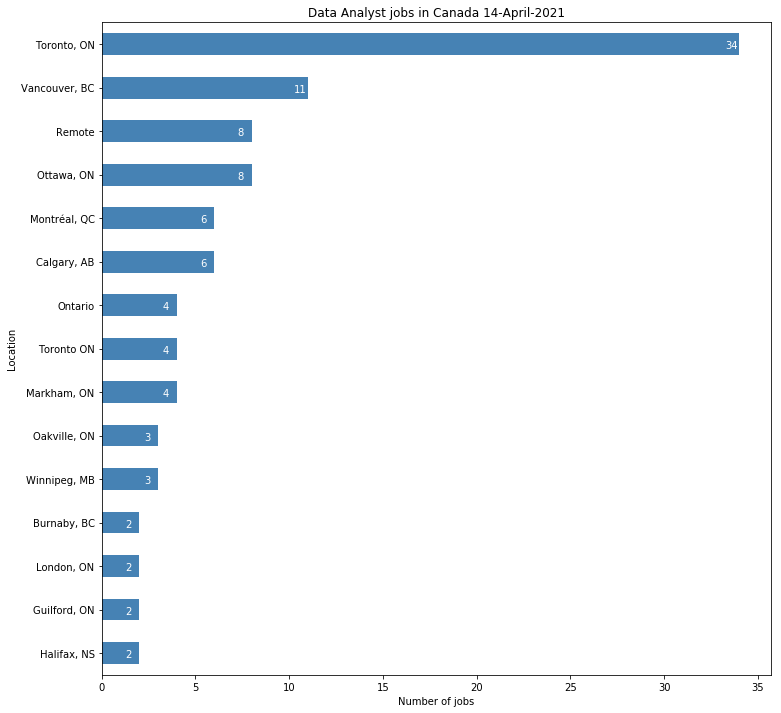

In [40]:
data13.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of jobs')
plt.title(job_title_1+' jobs in Canada '+str(d2))

for index, value in enumerate(data13): 
    label = format(int(value), ',')
    
    plt.annotate(label, xy=(value - 0.75, index - 0.10), color='white')
plt.savefig('images/'+job_title_us+'_jobs_in_Canada-'+str(d2))
plt.show()

Let's plot the salary range as well.

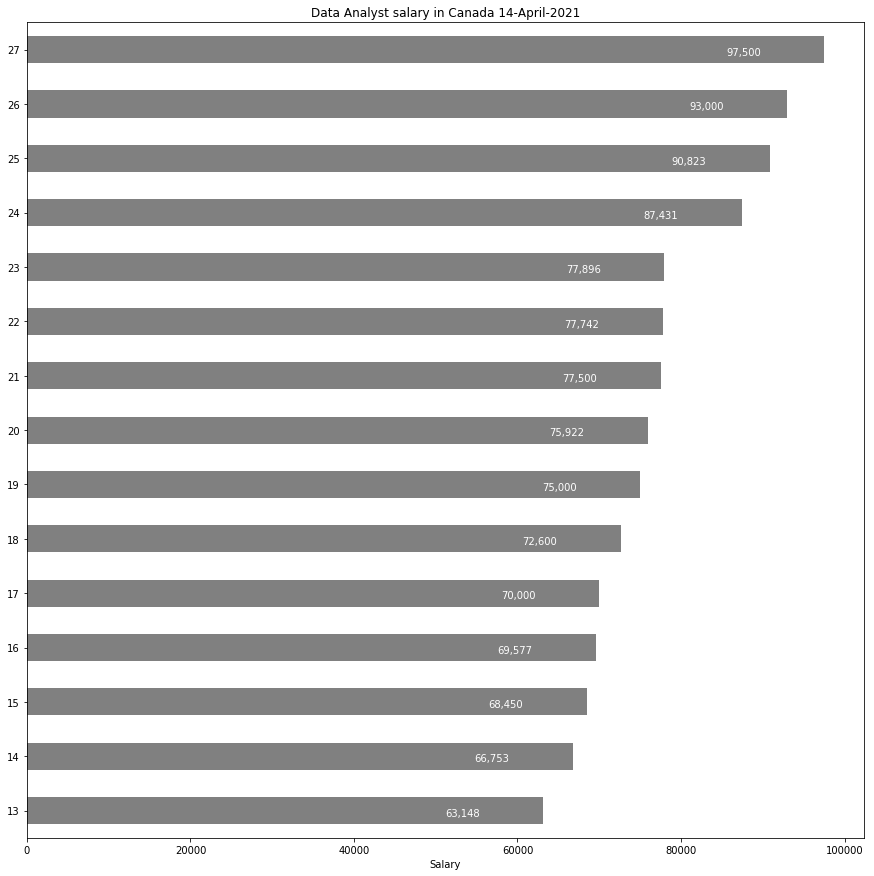

In [41]:
data_sal_all_2.plot(kind='barh', figsize=(15, 15), color='grey')
plt.xlabel('Salary')
plt.title(job_title_1+' salary in Canada '+str(d2))

for index, value in enumerate(data_sal_all_2): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value - 12000, index - 0.10), color='white')
plt.savefig('images/'+job_title_us+'_salary_in_Canada-'+str(d2))
plt.show()